# XGBoost with Python and Scikit-Learn 


**XGBoost** is an acronym for **Extreme Gradient Boosting**. It is a powerful machine learning algorithm that can be used to solve classification and regression problems. In this project, I implement XGBoost with Python and Scikit-Learn to solve a classification problem. The problem is to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.


## Table of Contents



1.	Introduction to XGBoost algorithm
2.	XGBoost algorithm intuition
3.	The problem statement
4.	Dataset description
5.	Import libraries
6.	Import dataset
7.	Exploratory data analysis
8.	Declare feature vector and target variable
9.	Split data into separate training and test set
10.	Train the XGBoost classifier
11.	Make predictions with XGBoost classifier
12.	Check accuracy score
13.	k-fold Cross Validation using XGBoost
14.	Feature importance with XGBoost
15.	Results and conclusion


## 1. Introduction to XGBoost algorithm


**XGBoost** stands for **Extreme Gradient Boosting**.  XGBoost is a powerful machine learning algorithm that is dominating the world of applied machine learning and Kaggle competitions. It is an implementation of gradient boosted trees designed for speed and accuracy.


**XGBoost (Extreme Gradient Boosting)** is an advanced implementation of the gradient boosting algorithm. It has proved to be a highly effective machine learning algorithm extensively used in machine learning competitions. XGBoost has high predictive power and is almost 10 times faster than other gradient boosting techniques. It also includes a variety of regularization parameters which reduces overfitting and improves overall performance. Hence, it is also known as **regularized boosting** technique.


## 2. XGBoost algorithm intuition


XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms. It uses the gradient boosting (GBM) framework at its core. So, first of all we should know about gradient boosting.


### Gradient boosting

Gradient boosting is a supervised machine learning algorithm, which tries to predict a target variable by combining the estimates of a set of simpler, weaker models. In boosting, the trees are built in a sequential manner such that each subsequent tree aims to reduce the errors of the previous tree. The misclassified labels are given higher weights.  Each tree learns from its predecessors and tries to reduce the residual errors. So, the tree next in sequence will learn from the previous tree residuals.


### XGBoost

In XGBoost, we try to fit a model on the gradient of the loss function generated from the previous step. So, in XGBoost we modified our gradient boosting algorithm so that it works with any differentiable loss function.


## 3. The problem statement

In this project, I try to solve a classification problem. The problem is to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers. I implement XGBoost with Python and Scikit-Learn to solve the classification problem. 


## 4. Dataset description


I have used the `Wholesale customers data set` for this project, downloaded from the UCI Machine learning repository. 
This dataset can be found at the following url-


https://archive.ics.uci.edu/ml/datasets/Wholesale+customers



## 5. Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings

warnings.filterwarnings('ignore')

## 6. Import dataset

In [9]:
# Import dataset

data = '/Users/ryanhuang/Developer/GraLNA/data_FraudDetection_JAR2020.csv'

df = pd.read_csv(data)

## 7. Exploratory Data Analysis


I will start off by checking the shape of the dataset.

In [10]:
df.shape

(146045, 46)

We can see that there are 440 instances and 8 attributes in the dataset.

### Preview dataset

In [11]:
df.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


We can see that `Channel` variable contains values as `1` and `2`. These two values classify the customers from two different channels as 1 for Horeca (Hotel/Retail/Café) customers and 2 for Retail channel (nominal) customers.

### View summary of dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

We can see that there are only numerical variables in the dataset.

### View summary statistics of dataframe

In [13]:
df.describe()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,964.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,54243.435516,2503.840249,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,59937.455765,912.093250,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,1004.000000,371.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,10658.000000,1803.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,25088.000000,2620.500000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,66586.000000,3180.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,317264.000000,3996.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


### Check for missing values

In [14]:
df.isnull().sum()

fyear               0
gvkey               0
p_aaer         145081
misstate            0
act                 0
ap                  0
at                  0
ceq                 0
che                 0
cogs                0
csho                0
dlc                 0
dltis               0
dltt                0
dp                  0
ib                  0
invt                0
ivao                0
ivst                0
lct                 0
lt                  0
ni                  0
ppegt               0
pstk                0
re                  0
rect                0
sale                0
sstk                0
txp                 0
txt                 0
xint                0
prcc_f              0
dch_wc           4759
ch_rsst          4851
dch_rec          4743
dch_inv          4615
soft_assets       592
ch_cs           15918
ch_cm           17107
ch_roa          12678
issue               0
bm                 18
dpi              9228
reoa              591
EBIT              591
ch_fcf    

There are no missing values in the dataset.

## 8. Declare feature vector and target variable

In [19]:
X = df.drop(['misstate','gvkey','p_aaer','fyear'], axis=1)

y = df['misstate']

### let's take a look at feature vector(X) and target variable(y)

In [20]:
X.head()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,17.691,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,5.871,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,37.603,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,8.906,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,0.266,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: misstate, dtype: int64

We can see that the y labels contain values as 1 and 2. I will need to convert it into 0 and 1 for further analysis. I will do it as follows-

In [24]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.0 MB/s eta 0:00:0000:0100:01


Now, I will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. I will do it as follows.

In [25]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

## 9. Split data into separate training and test set

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 10. Train the XGBoost classifier


- Now, I will train the XGBoost classifier. We need to know different parameters that XGBoost provides. There are three types of parameters that we must set before running XGBoost. These parameters are as follows:-


### General parameters

These parameters relate to which booster we are doing boosting. The common ones are tree or linear model.


### Booster parameters

It depends on which booster we have chosen for boosting.


### Learning task parameters

These parameters decide on the learning scenario. For example, regression tasks may use different parameters than ranking tasks. 


### Command line parameters

In addition there are command line parameters which relate to behaviour of CLI version of XGBoost.


The most important parameters that we should know about are as follows:-


**learning_rate** - It gives us the step size shrinkage which is used to prevent overfitting. Its range is [0,1].

**max_depth** - It determines how deeply each tree is allowed to grow during any boosting round.

**subsample** - It determines the percentage of samples used per tree. Low value of subsample can lead to underfitting.

**colsample_bytree** - It determines the percentage of features used per tree. High value of it can lead to overfitting.

**n_estimators** - It is the number of trees we want to build.

**objective** - It determines the loss function to be used in the process. For example, `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.


XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple models. These regularization parameters are as follows:-


**gamma** - It controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. It is supported only for tree-based learners.

**alpha** - It gives us the `L1` regularization on leaf weights. A large value of it leads to more regularization.

**lambda** - It gives us the `L2` regularization on leaf weights and is smoother than `L1` regularization.

Though we are using trees as our base learners, we can also use XGBoost’s relatively less popular linear base learners and one other tree learner known as `dart`. We have to set the `booster` parameter to either `gbtree` (default), `gblinear` or `dart`.


In [31]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


## 11. Make predictions with XGBoost Classifier

In [33]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

## 12. Check accuracy score

In [34]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9934


We can see that XGBoost obtain very high accuracy score of 91.67%.

## 13. k-fold Cross Validation using XGBoost


To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the original training dataset is used for both training and validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation using the `cv()` method. In this method, we will specify several parameters which are as follows:- 


**nfolds** - This parameter specifies the number of cross-validation sets we want to build. 

**num_boost_round** - It denotes the number of trees we build.

**metrics** - It is the performance evaluation metrics to be considered during CV.

**as_pandas** - It is used to return the results in a pandas DataFrame.

**early_stopping_rounds** - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

**seed** - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling `XGBoost's CV()` method.


In [35]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

`xgb_cv` contains train and test `auc` metrics for each boosting round. Let's preview `xgb_cv`.

In [36]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.500000,0.000000,0.500000,0.000000
1,0.500000,0.000000,0.500000,0.000000
2,0.500000,0.000000,0.500000,0.000000
3,0.500000,0.000000,0.500000,0.000000
4,0.521144,0.029902,0.509011,0.012744


## 14. Feature importance with XGBoost


XGBoost provides a way to examine the importance of each feature in the original dataset within the model. It involves counting the number of times each feature is split on across all boosting trees in the model. Then we visualize the result as a bar graph, with the features ordered according to how many times they appear. 

XGBoost has a **plot_importance()** function that helps us to achieve this task. Then we can visualize the features that has been given the highest important score among all the features. Thus XGBoost provides us a way to do feature selection.

I will proceed as follows:-


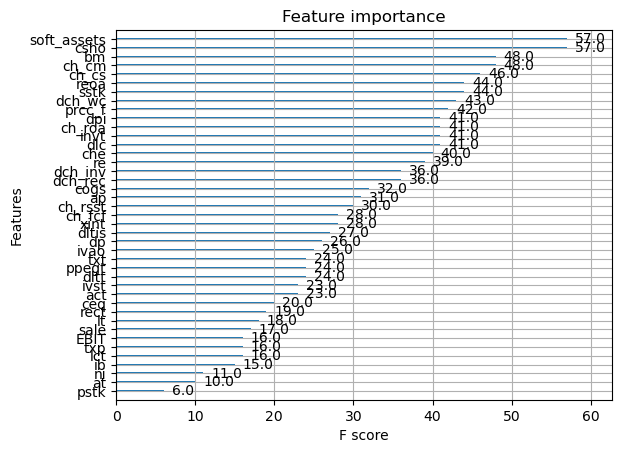

In [37]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

We can see that the feature `Grocery`  has been given the highest importance score among all the features. Thus XGBoost also gives us a way to do Feature Selection.

## 15. Results and conclusion


1.	In this project, I implement XGBoost with Python and Scikit-Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

2.	The y labels contain values as 1 and 2. I have converted them into 0 and 1 for further analysis.
3.	I have trained the XGBoost classifier and found the accuracy score to be 91.67%.

4.	I have done the hyperparameter tuning in XGBoost by doing k-fold cross-validation.

5.	I find the most important feature in XGBoost to be `Grocey`. I did it using the **plot_importance()** function in XGBoost that helps us to achieve this task. 
